In [190]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [132]:
df = pd.read_csv("https://sololearn.com/uploads/files/iris.csv")
df.head()

,id,sepal_len,sepal_wd,petal_len,petal_wd,species
0,0,5.1,3.5,1.4,0.2,iris-setosa
1,1,4.9,3.0,1.4,0.2,iris-setosa
2,2,4.7,3.2,1.3,0.2,iris-setosa
3,3,4.6,3.1,1.5,0.2,iris-setosa
4,4,5.0,3.6,1.4,0.2,iris-setosa


In [133]:
df.shape

(150, 6)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         150 non-null    int64  
 1   sepal_len  150 non-null    float64
 2   sepal_wd   150 non-null    float64
 3   petal_len  150 non-null    float64
 4   petal_wd   150 non-null    float64
 5   species    150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [135]:
df.describe()

,id,sepal_len,sepal_wd,petal_len,petal_wd
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [136]:
df.isna().sum()

id           0
sepal_len    0
sepal_wd     0
petal_len    0
petal_wd     0
species      0
dtype: int64

In [137]:
df.columns

Index(['id', 'sepal_len', 'sepal_wd', 'petal_len', 'petal_wd', 'species'], dtype='object')

In [138]:
df.drop("id",axis=1,inplace=True)

In [139]:
df.head()

,sepal_len,sepal_wd,petal_len,petal_wd,species
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa


# Visualization 

<AxesSubplot:xlabel='species', ylabel='count'>

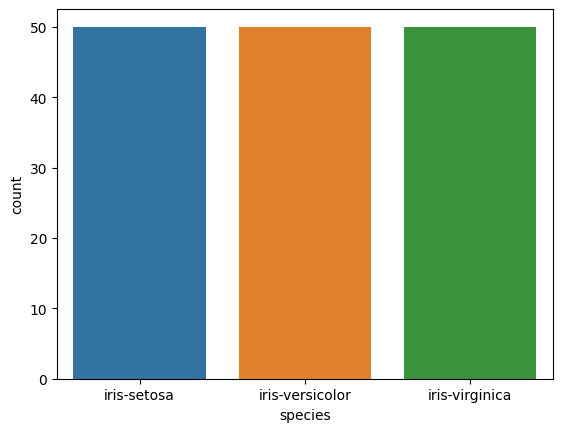

In [140]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

#countplot
sns.countplot(x="species",
              data=df)

array([[<AxesSubplot:title={'center':'sepal_len'}>,
        <AxesSubplot:title={'center':'sepal_wd'}>],
       [<AxesSubplot:title={'center':'petal_len'}>,
        <AxesSubplot:title={'center':'petal_wd'}>]], dtype=object)

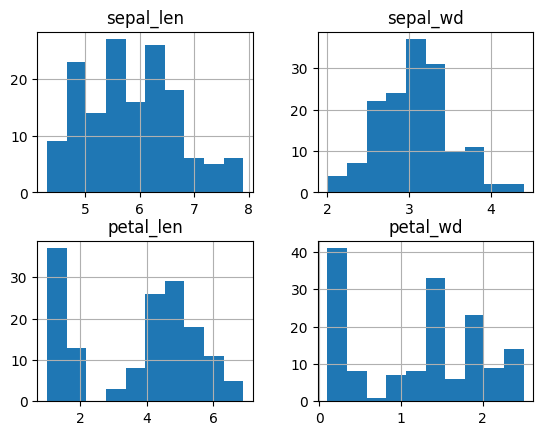

In [193]:
df.hist()

<AxesSubplot:xlabel='sepal_len', ylabel='sepal_wd'>

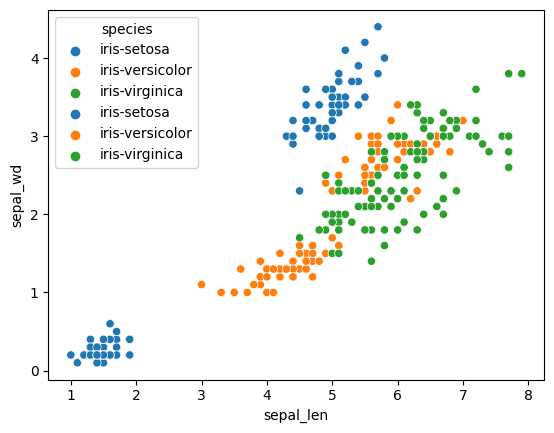

In [194]:
#scatter plot
sns.scatterplot(x="sepal_len",
                y="sepal_wd",
                hue="species",
                data=df)
sns.scatterplot(x="petal_len",
                y="petal_wd",
                hue="species",
                data=df)

<AxesSubplot:xlabel='petal_len', ylabel='petal_wd'>

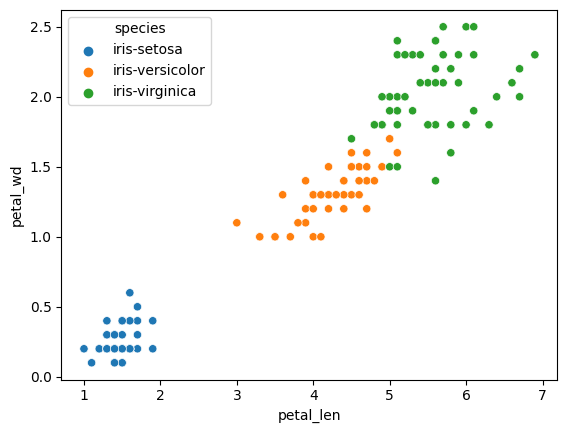

In [142]:
sns.scatterplot(x="petal_len",
                y="petal_wd",
                hue="species",
                data=df)

<AxesSubplot:xlabel='sepal_len', ylabel='sepal_wd'>

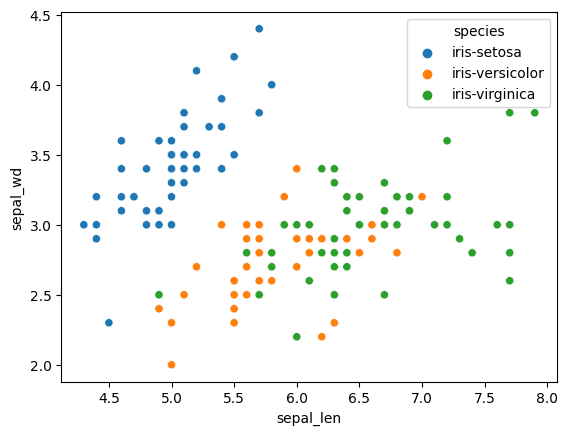

In [143]:
sns.scatterplot(x="sepal_len",
                y="sepal_wd",
                hue="species",
                data=df)

<AxesSubplot:xlabel='sepal_len', ylabel='Density'>

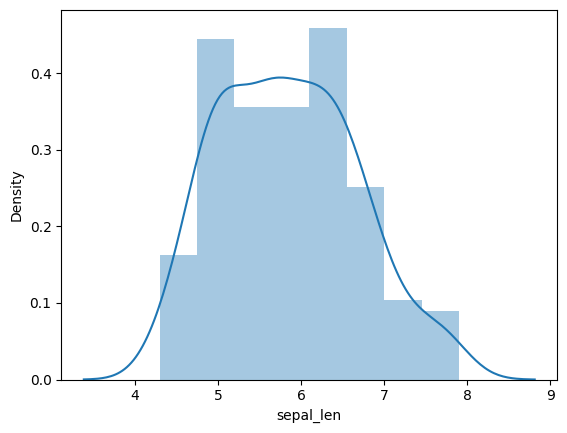

In [144]:
sns.distplot(df["sepal_len"],
             kde=True)

<Figure size 1400x800 with 0 Axes>

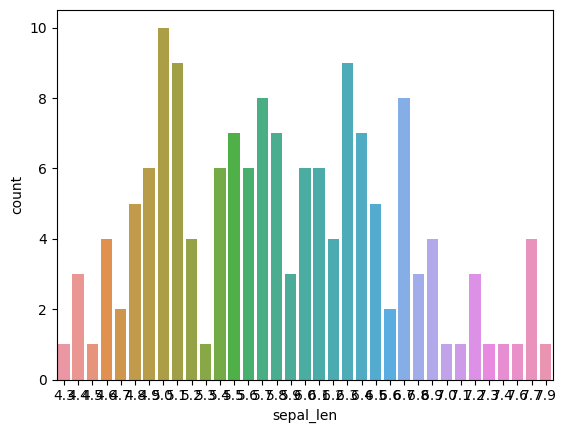

<Figure size 1400x800 with 0 Axes>

In [145]:
sns.countplot(x="sepal_len",
            data=df)
plt.figure(figsize=(14,8))

In [201]:
df.corr()

,sepal_len,sepal_wd,petal_len,petal_wd
sepal_len,1.000000,-0.117570,0.871754,0.817941
sepal_wd,-0.117570,1.000000,-0.428440,-0.366126
petal_len,0.871754,-0.428440,1.000000,0.962865
petal_wd,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

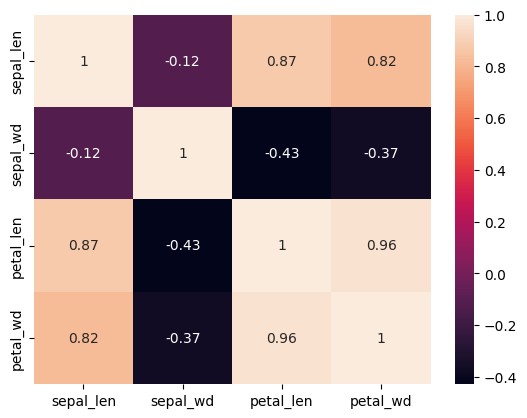

In [200]:
corr = df.corr()
sns.heatmap(corr,annot=True)

<Figure size 1400x800 with 0 Axes>

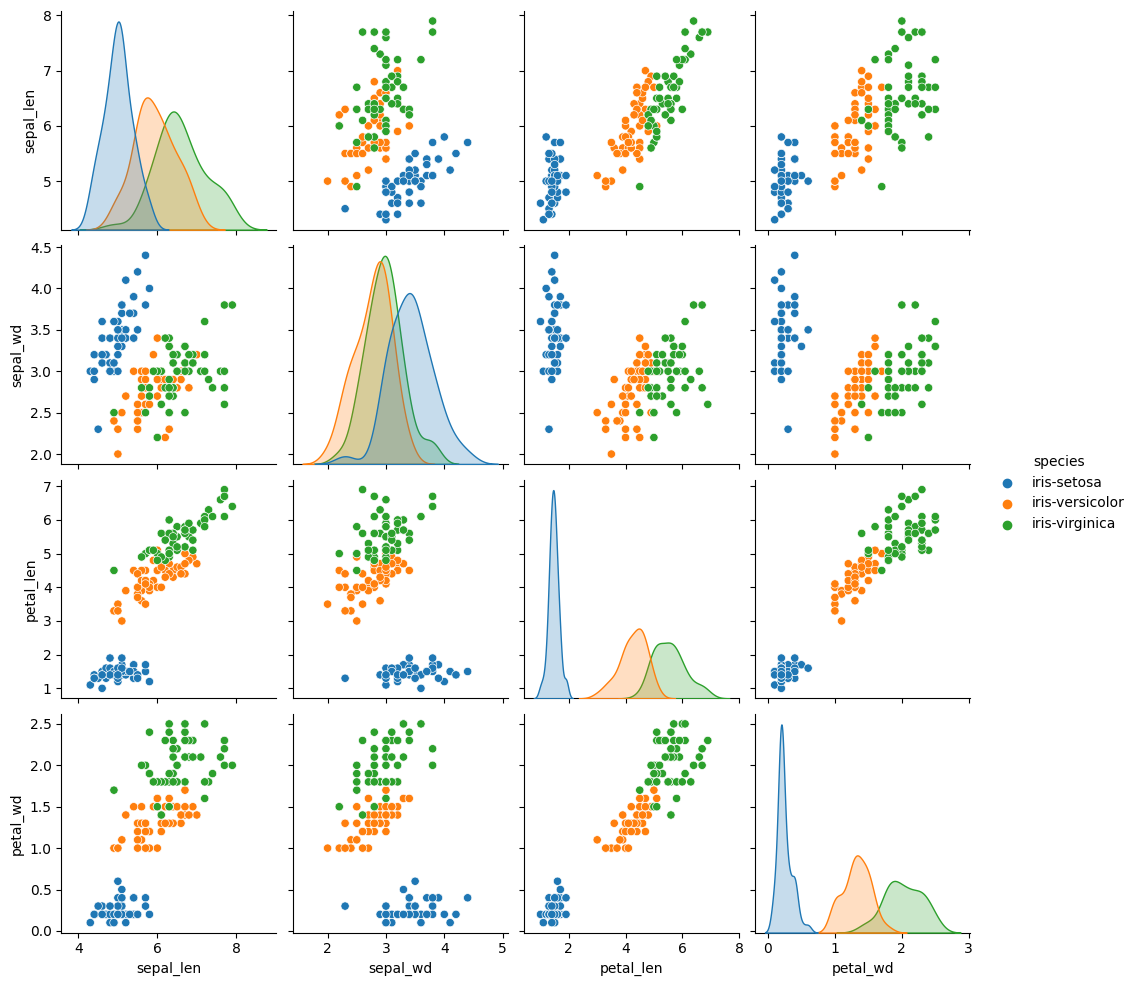

<Figure size 1400x800 with 0 Axes>

In [146]:
sns.pairplot(df,hue="species")
plt.figure(figsize=(14,8))

In [147]:
#indipendent and dependent variables

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y ,random_state=0)

In [148]:
scaler = StandardScaler() #standarizing the values
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [149]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
pred1 = knn.predict(x_test)
pred1[:5]

array(['iris-virginica', 'iris-virginica', 'iris-setosa', 'iris-setosa',
       'iris-versicolor'], dtype=object)

In [150]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test,pred1)*100

97.77777777777777

In [151]:
cm = confusion_matrix(y_test,pred1)
cm

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

<AxesSubplot:>

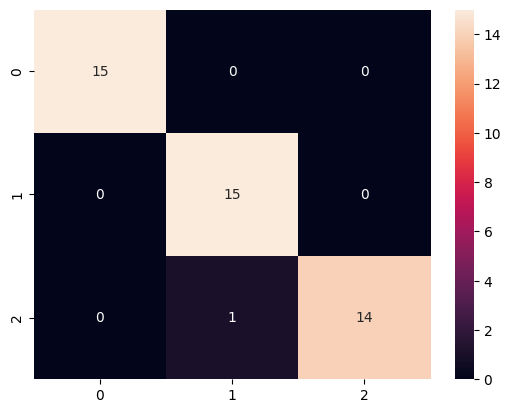

In [152]:
#plot the confusion matrix on heatmap

sns.heatmap(cm,annot=True)

In [153]:
print("first_accuracy is {}".format(accuracy_score(y_test,pred1)))
print(15*"--")
print(knn.predict_proba(x_test)[:5])

first_accuracy is 0.9777777777777777
------------------------------
[[0.         0.         1.        ]
 [0.         0.14285714 0.85714286]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.85714286 0.14285714]]


In [154]:
#cross validation for our data

from sklearn.model_selection import cross_val_score,GridSearchCV

cross_val = cross_val_score(estimator=knn,X=X,y=y,cv=10)
print("cross validation -",cross_val.mean().round(2))

cross validation - 0.97


In [155]:
param = {"n_neighbors":np.arange(1,10,2)}

knn_gscv = GridSearchCV(estimator=knn,param_grid=param,cv=10)
knn_gscv.fit(X,y)
knn_gscv.best_score_
knn_gscv.best_params_

{'n_neighbors': 9}

In [177]:
knn2 = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_["n_neighbors"])
knn2.fit(x_train,y_train)
print(knn2.predict(x_test)[:5])


['iris-virginica' 'iris-virginica' 'iris-setosa' 'iris-setosa'
 'iris-versicolor']


In [178]:
final = knn2.predict(x_test)

In [179]:
pred2 = knn2.predict_proba(x_test)
pred2[:5]

array([[0.        , 0.        , 1.        ],
       [0.        , 0.22222222, 0.77777778],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.77777778, 0.22222222]])

In [180]:
accuracy_score(y_test,final)*100

97.77777777777777

<AxesSubplot:>

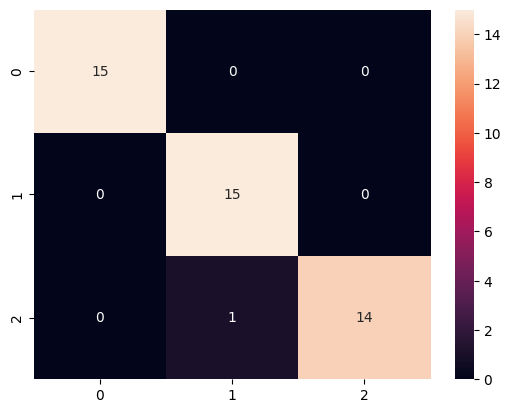

In [181]:
cm = confusion_matrix(y_test,final)
sns.heatmap(cm,annot=True)

In [183]:
new_data = np.array([[5.4,3.4,1.7,0.2],
                    [2.3,3.4,5.6,8.9],
                    [6.8,2.3,4.5,7.6]])
knn2.predict(new_data)
    
    
    
    

array(['iris-virginica', 'iris-virginica', 'iris-virginica'], dtype=object)

In [189]:
from sklearn.metrics import classification_report

#Classification report 

print(classification_report(y_test,final))


                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        15
iris-versicolor       0.94      1.00      0.97        15
 iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

